In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
# import statsmodels.api as sm
from scipy.special import softmax
# from dmba import *
# import statsmodels.formula.api as smf

### Simple linear regression

In [2]:
lung = pd.read_csv("data/LungDisease.csv")

In [3]:
predictors = ["Exposure"]
outcome = "PEFR"

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])
intercept = model.intercept_
coef = model.coef_[0]
print(f'Intercept: {intercept:.3f}')
print(f'Coefficient Exposure: {coef:.3f}')
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

Intercept: 424.583
Coefficient Exposure: -4.185


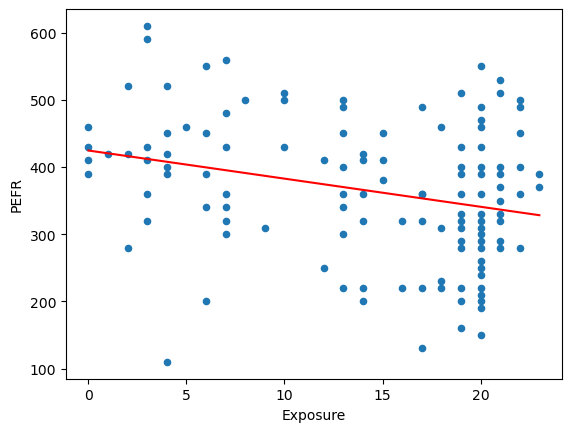

In [4]:
lung.plot(kind = "scatter", x = "Exposure", y = "PEFR")
plt.plot(lung["Exposure"].values, intercept + coef*lung["Exposure"].values, color = "r")
plt.show()

### Multiple Linear Regression

#### Example: King County Housing Data

In [5]:
house = pd.read_table("data/house_sales.csv")

In [9]:
house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [6]:
house.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [8]:
n = house.shape[0]  # number of observations
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
p = len(predictors) # number of predictors

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome]);

In [9]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240498
 SqFtLot: -0.06046682065305298
 Bathrooms: -19442.8403983214
 Bedrooms: -47769.955185213956
 BldgGrade: 106106.96307898125


#### Assessing the Model

In [9]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(metrics.mean_squared_error(house[outcome], fitted))
RSE = RMSE*np.sqrt(n/(n-(p + 1 )))
r2 = metrics.r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'RSE: {RSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261210
RSE: 261244
r2: 0.5407


In [10]:
model = sm.OLS(house[outcome], house[predictors].assign(const = 1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5340.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:34:58   Log-Likelihood:            -3.1520e+05
No. Observations:               22689   AIC:                         6.304e+05
Df Residuals:                   22683   BIC:                         6.305e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8321      3.898     58.699      0.000     221.191     236.473
SqFtLot          -0.0605      0.061     -0.989      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.219     -5.362      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.778e+04   2489.443    -19.194      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.136     44.287      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.349      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29679.186   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19394127.212
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.565   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model Selection and Stepwise Regression

In [11]:
# para entender mejor la idea de dummies

In [12]:
pd.Series(list('abcaa'))

0    a
1    b
2    c
3    a
4    a
dtype: object

In [13]:
pd.get_dummies(pd.Series(list('abcaa')))

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0


In [14]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade',
'PropertyType', 'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt',
'YrRenovated', 'NewConstruction']
X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]
house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2772.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:35:01   Log-Likelihood:            -3.1378e+05
No. Observations:               22689   AIC:                         6.276e+05
Df Residuals:                   22676   BIC:                         6.277e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6311      4.233     46.922      0.000     190.334     206.928
SqFtLot                        0.0770      0.058      1.329      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.013     11.256      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.189e+04   2396.632    -21.652      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2440.995     56.243      0.000    1.33e+05    1.42e+05
NbrLivingUnits              5765.1825   1.76e+04      0.328      0.743   -2.87e+04    4.02e+04
SqFtFinBasement                7.0494      4.627      1.524      0.128      -2.020      16.119
YrBuilt                    -3573.7824     77.220    -46.281      0.000   -3725.139   -3422.426
YrRenovated                   -2.5194      3.924     -0.642      0.521     -10.210       5.171
NewConstruction            -2440.7694   5935.656     -0.411      0.681   -1.41e+04    9193.524
PropertyType_Single Family  2.996e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.279e+04    2.7e+04      3.436      0.001    3.99e+04    1.46e+05
const                       6.181e+06   1.55e+05     39.900      0.000    5.88e+06    6.48e+06
==============================================================================
Omnibus:                    31008.164   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26253527.214
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.981   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose=True)

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=648047.41, constant
Step: score=633068.91, add SqFtTotLiving
Step: score=630847.73, add BldgGrade
Step: score=628284.84, add YrBuilt
Step: score=627838.21, add Bedrooms
Step: score=627656.24, add Bathrooms
Step: score=627579.79, add PropertyType_Townhouse
Step: score=627579.23, add SqFtFinBasement
Step: score=627579.13, add PropertyType_Single Family
Step: score=627579.13, unchanged None
Intercept: 6177658.144
Coefficients:
 SqFtTotLiving: 199.27474217544838
 BldgGrade: 137181.13724627104
 YrBuilt: -3564.934870415166
 Bedrooms: -51974.7684556797
 Bathrooms: 42403.05999967748
 PropertyType_Townhouse: 84378.93333640444
 SqFtFinBasement: 7.032178917521378
 PropertyType_Single Family: 22854.87954019293


#### Weighted regression

In [16]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house.Year - 2005

In [17]:
house['Year']

1        2014
2        2006
3        2007
4        2008
5        2013
         ... 
27057    2011
27058    2007
27061    2012
27062    2006
27063    2007
Name: Year, Length: 22689, dtype: int64

In [18]:
house.DocumentDate

1        2014-09-16
2        2006-06-16
3        2007-01-29
4        2008-02-25
5        2013-03-29
            ...    
27057    2011-04-08
27058    2007-09-28
27061    2012-07-09
27062    2006-05-26
27063    2007-01-09
Name: DocumentDate, Length: 22689, dtype: object

In [19]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)

LinearRegression()

### Factor variables in regression

In [20]:
house.PropertyType.head(10)

1         Multiplex
2     Single Family
3     Single Family
4     Single Family
5     Single Family
6         Townhouse
7     Single Family
8     Single Family
9     Single Family
10        Multiplex
Name: PropertyType, dtype: object

In [21]:
pd.get_dummies(house['PropertyType']).head()

,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [22]:
pd.get_dummies(house['PropertyType'], drop_first=True).head()

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


In [23]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
    'BldgGrade', 'PropertyType']
X = pd.get_dummies(house[predictors], drop_first=True)
house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])
print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')

Intercept: -446878.742
Coefficients:
 SqFtTotLiving: 223.37386435242882
 SqFtLot: -0.07041335666276893
 Bathrooms: -15973.134952397331
 Bedrooms: -50900.596140255584
 BldgGrade: 109426.2229798735
 PropertyType_Single Family: -84691.37983985765
 PropertyType_Townhouse: -115147.08567736212


#### Factor Variables with Many Levels

In [33]:
house = pd.read_table("house_sales.csv")

In [34]:
n = house.shape[0]  # number of observations
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
p = len(predictors) # number of predictors

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome]);

In [35]:
pd.DataFrame(house['ZipCode'].value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98354,98050,98057,98288,98224,9800,98113,89118,98043,98068
ZipCode,788,671,641,620,619,614,575,517,513,502,...,9,7,4,4,3,1,1,1,1,1


In [36]:
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

In [7]:
zip_groups = pd.DataFrame([*pd.DataFrame({'ZipCode': house['ZipCode'], 'residual' : house[outcome] - house_lm.predict(house[predictors])}).groupby(['ZipCode']).apply(lambda x: {'ZipCode': x.iloc[0,0], 'count': len(x), 'median_residual': x.residual.median()})]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')

house_new = house.join(to_join, on='ZipCode')
# house_new['ZipGroup'] = house_new['ZipGroup'].astype('category')

In [8]:
house_new

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,ZipGroup
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,6,7,1991,0,0,70000,229000,98002,False,2
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,4,10,2005,0,0,203000,590000,98166,True,2
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,4,8,1947,0,0,183000,275000,98166,False,2
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,5,7,1966,0,0,104000,229000,98168,False,2
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,4,7,1948,0,0,104000,205000,98168,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,3,7,1951,0,0,201000,172000,98126,False,3
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4,11,2000,0,1,703000,951000,98040,False,4
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,4,6,1971,0,0,92000,130000,98055,False,0
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,3,7,1939,0,0,103000,212000,98166,False,2


In [87]:
house

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,1.75,3,7,1951,0,0,201000,172000,98126,False
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4.50,4,11,2000,0,1,703000,951000,98040,False
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,2.00,3,7,1939,0,0,103000,212000,98166,False


In [88]:
house_new

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,ZipGroup
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,6,7,1991,0,0,70000,229000,98002,False,2
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,4,10,2005,0,0,203000,590000,98166,True,2
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,4,8,1947,0,0,183000,275000,98166,False,2
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,5,7,1966,0,0,104000,229000,98168,False,2
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,4,7,1948,0,0,104000,205000,98168,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,3,7,1951,0,0,201000,172000,98126,False,3
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4,11,2000,0,1,703000,951000,98040,False,4
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,4,6,1971,0,0,92000,130000,98055,False,0
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,3,7,1939,0,0,103000,212000,98166,False,2


In [86]:
to_join

,ZipGroup
ZipCode,
98057,0
98043,0
98092,0
98038,0
98051,0
...,...
98119,4
98112,4
98040,4


In [78]:
zip_groups

,ZipCode,count,median_residual,cum_count,ZipGroup
38,98057,4,-537348.542099,4,0
29,98043,1,-307661.171374,5,0
48,98092,289,-193576.183227,294,0
25,98038,788,-150059.691493,1082,0
33,98051,32,-142367.200303,1114,0
...,...,...,...,...,...
62,98119,260,174456.731992,21748,4
56,98112,357,232797.595515,22105,4
27,98040,244,253980.554368,22349,4
5,98004,293,383563.489262,22642,4


In [47]:
pd.DataFrame({'ZipCode': house['ZipCode'], 'residual' : house[outcome] - house_lm.predict(house[predictors]),}).groupby(['ZipCode']).apply(lambda x: {'ZipCode': x.iloc[0,0], 'count': len(x), 'median_residual': x.residual.median()})

ZipCode
9800     {'ZipCode': 9800, 'count': 1, 'median_residual...
89118    {'ZipCode': 89118, 'count': 1, 'median_residua...
98001    {'ZipCode': 98001, 'count': 358, 'median_resid...
98002    {'ZipCode': 98002, 'count': 180, 'median_resid...
98003    {'ZipCode': 98003, 'count': 241, 'median_resid...
                               ...                        
98198    {'ZipCode': 98198, 'count': 225, 'median_resid...
98199    {'ZipCode': 98199, 'count': 393, 'median_resid...
98224    {'ZipCode': 98224, 'count': 3, 'median_residua...
98288    {'ZipCode': 98288, 'count': 4, 'median_residua...
98354    {'ZipCode': 98354, 'count': 9, 'median_residua...
Length: 82, dtype: object

In [50]:
[*pd.DataFrame({'ZipCode': house['ZipCode'], 'residual' : house[outcome] - house_lm.predict(house[predictors]),}).groupby(['ZipCode']).apply(lambda x: {'ZipCode': x.iloc[0,0], 'count': len(x), 'median_residual': x.residual.median()})]

[{'ZipCode': 9800, 'count': 1, 'median_residual': 84000.61516787997},
 {'ZipCode': 89118, 'count': 1, 'median_residual': -69862.08989084372},
 {'ZipCode': 98001, 'count': 358, 'median_residual': -125540.78000055044},
 {'ZipCode': 98002, 'count': 180, 'median_residual': -60062.5764063361},
 {'ZipCode': 98003, 'count': 241, 'median_residual': -131511.93792963133},
 {'ZipCode': 98004, 'count': 293, 'median_residual': 383563.4892618768},
 {'ZipCode': 98005, 'count': 133, 'median_residual': 69750.39919960231},
 {'ZipCode': 98006, 'count': 460, 'median_residual': -10080.045197981526},
 {'ZipCode': 98007, 'count': 112, 'median_residual': 43914.07367393613},
 {'ZipCode': 98008, 'count': 291, 'median_residual': 56444.89497812325},
 {'ZipCode': 98010, 'count': 56, 'median_residual': -61426.82713807485},
 {'ZipCode': 98011, 'count': 163, 'median_residual': -60641.731894903234},
 {'ZipCode': 98014, 'count': 85, 'median_residual': -46884.13901744981},
 {'ZipCode': 98019, 'count': 242, 'median_resid

In [53]:
pd.DataFrame({'ZipCode': house['ZipCode'], 'residual' : house[outcome] - house_lm.predict(house[predictors]),})

,ZipCode,residual
1,98002,-123719.461859
2,98166,-59172.380809
3,98166,190114.526168
4,98168,-198773.408711
5,98168,-91759.120528
...,...,...
27057,98126,61926.716851
27058,98040,140786.871076
27061,98055,72353.674728
27062,98166,-3871.741917


In [55]:
pd.DataFrame({'ZipCode': house['ZipCode'], 'residual' : house[outcome] - house_lm.predict(house[predictors])})

,ZipCode,residual
1,98002,-123719.461859
2,98166,-59172.380809
3,98166,190114.526168
4,98168,-198773.408711
5,98168,-91759.120528
...,...,...
27057,98126,61926.716851
27058,98040,140786.871076
27061,98055,72353.674728
27062,98166,-3871.741917


In [57]:
zip_groups

,ZipCode,count,median_residual
38,98057,4,-537348.542099
29,98043,1,-307661.171374
48,98092,289,-193576.183227
25,98038,788,-150059.691493
33,98051,32,-142367.200303
...,...,...,...
62,98119,260,174456.731992
56,98112,357,232797.595515
27,98040,244,253980.554368
5,98004,293,383563.489262


In [59]:
new = pd.DataFrame({'ZipCode': house['ZipCode'], 'residual' : house[outcome] - house_lm.predict(house[predictors]),}).groupby(['ZipCode'])

In [62]:
new.get_group(98057)

,ZipCode,residual
10334,98057,-414014.816294
10335,98057,-537051.455330
10336,98057,-587202.104313
14335,98057,-537645.628867


(0, 1) (2, 3) (4, 7)

$y = a + bx_1+cx_2$

### Interpreting the regression equation

In [12]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Intercept: 6177658.144
Coefficients:
 SqFtTotLiving: 199.27474217544838
 BldgGrade: 137181.13724627104
 YrBuilt: -3564.934870415166
 Bedrooms: -51974.7684556797
 Bathrooms: 42403.05999967748
 PropertyType_Townhouse: 84378.93333640444
 SqFtFinBasement: 7.032178917521378
 PropertyType_Single Family: 22854.87954019293


In [13]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'
X = pd.get_dummies(house[predictors], drop_first=True)
reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])

LinearRegression()

In [14]:
reduced_lm.coef_

array([ 27136.35370667, 249018.92971837,  -3211.30034633, -19931.58450902,
       -47424.2744203 ])

In [15]:
for name, coef in zip(predictors, reduced_lm.coef_):
    print(f' {name}: {coef}')

 Bedrooms: 27136.35370666654
 BldgGrade: 249018.92971836956
 PropertyType: -3211.300346331089
 YrBuilt: -19931.58450901643


#### Confounding Variables 

In [37]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'
X = pd.get_dummies(house[predictors], drop_first=True)
confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])
print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -665438.171
Coefficients:
 SqFtTotLiving: 210.8198874525167
 SqFtLot: 0.4610750310477094
 Bathrooms: 5733.885836833719
 Bedrooms: -41773.87384820904
 BldgGrade: 98718.96235962381
 PropertyType_Single Family: 19189.602732478717
 PropertyType_Townhouse: -78310.22583037514
 ZipGroup_1: 51678.995880344344
 ZipGroup_2: 114029.53827781443
 ZipGroup_3: 176233.51095932638
 ZipGroup_4: 336165.6552494439


#### Interactions and Main Effects

In [41]:
model = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving*ZipGroup + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)

In [42]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3241.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:39:20   Log-Likelihood:            -3.1103e+05
No. Observations:               22689   AIC:                         6.221e+05
Df Residuals:                   22673   BIC:                         6.222e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4.876e+05   2.04e+04    -23.888      0.000   -5.28e+05   -4.48e+05
ZipGroup[T.1]                 -1.311e+04   1.36e+04     -0.966      0.334   -3.97e+04    1.35e+04
ZipGroup[T.2]                  2.264e+04   1.16e+04      1.943      0.052    -197.984    4.55e+04
ZipGroup[T.3]                  2.262e+04   1.19e+04      1.901      0.057    -703.376    4.59e+04
ZipGroup[T.4]                 -1.476e+05   1.11e+04    -13.312      0.000   -1.69e+05   -1.26e+05
PropertyType[T.Single Family]  1.339e+04   1.39e+04      0.961      0.336   -1.39e+04    4.07e+04
PropertyType[T.Townhouse]     -5.883e+04   1.51e+04     -3.885      0.000   -8.85e+04   -2.92e+04
SqFtTotLiving                   117.7056      4.731     24.881      0.000     108.433     126.978
SqFtTotLiving:ZipGroup[T.1]      31.4889      5.786      5.442      0.000      20.147      42.830
SqFtTotLiving:ZipGroup[T.2]      38.9110      5.079      7.661      0.000      28.956      48.866
SqFtTotLiving:ZipGroup[T.3]      66.5951      5.522     12.060      0.000      55.772      77.418
SqFtTotLiving:ZipGroup[T.4]     223.8079      4.705     47.571      0.000     214.586     233.030
SqFtLot                           0.6957      0.052     13.449      0.000       0.594       0.797
Bathrooms                     -3935.0637   3204.794     -1.228      0.220   -1.02e+04    2346.552
Bedrooms                      -4.196e+04   2121.300    -19.780      0.000   -4.61e+04   -3.78e+04
BldgGrade                      1.048e+05   2070.183     50.638      0.000    1.01e+05    1.09e+05
==============================================================================
Omnibus:                    30903.147   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         34200619.908
Skew:                           7.267   Prob(JB):                         0.00
Kurtosis:                     192.646   Cond. No.                     5.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""